In [1]:
# Project 3: 
# 1) Build ML Models to predict Bank of America's next day price using historcial data
# peer financial stocks( JPM, MS,C,WFC) and key macro variables
# oil prices and gold prices

#2) Feature engineering

# 3) Apply different ML algorithms such as Deciion trees, Random forest,SVM,K nearest neighbour

# 4) will evaluate the model based on R square,RMSE,MSE,MAE & other metrics

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:
#'BAC'- Bank of America
#'JPM'-JP Morgan
#'MS'- Morgan Stanley
#'C'- Citi Group
#'WFC'- Wells Fargo 
#'SPY'-S&P500
#'^VIX'- CBOE Volatility Index
#'^TNX'- 10Y US Treasury yeild
#'DX-Y.NYB'- US Dollar Index
#'CL=F'- Crude oil
#'GC=F'- Gold futures

In [4]:
# Download the data from yahoo finance

tickers=['BAC','JPM','MS','C','WFC','SPY','^VIX','^TNX','DX-Y.NYB','CL=F','GC=F']
data=yf.download(tickers,start='2002-01-01',end='2025-01-01')['Close']
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  11 of 11 completed


Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.739309,276.156708,21.010000,115.790001,278.899994,18.587135,27.954084,75.131645,11.306946,5.157,22.709999
2002-01-03,17.719597,276.373352,20.370001,116.110001,278.200012,19.083132,28.764069,75.983559,11.348585,5.120,21.340000
2002-01-04,17.995710,281.516418,21.620001,116.330002,278.899994,19.942181,30.191635,76.490814,11.377214,5.141,20.450001
2002-01-07,17.781584,278.214020,21.480000,116.330002,278.600006,19.891037,29.963835,75.951057,11.395435,5.057,21.940001
2002-01-08,17.497013,267.981964,21.250000,116.830002,278.899994,19.737640,29.336092,75.775452,11.351189,5.057,21.830000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,43.843319,69.952347,70.099998,108.260002,2620.000000,239.589233,125.215454,599.496582,70.849594,4.591,14.270000
2024-12-26,44.011265,70.297188,69.620003,108.129997,2638.800049,240.409912,126.171379,599.536499,71.017845,4.579,14.730000
2024-12-27,43.803802,69.952347,70.599998,108.000000,2617.199951,238.462036,124.919815,593.225464,70.374565,4.619,15.950000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5810 entries, 2002-01-02 to 2024-12-31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BAC       5789 non-null   float64
 1   C         5789 non-null   float64
 2   CL=F      5779 non-null   float64
 3   DX-Y.NYB  5807 non-null   float64
 4   GC=F      5775 non-null   float64
 5   JPM       5789 non-null   float64
 6   MS        5789 non-null   float64
 7   SPY       5789 non-null   float64
 8   WFC       5789 non-null   float64
 9   ^TNX      5783 non-null   float64
 10  ^VIX      5789 non-null   float64
dtypes: float64(11)
memory usage: 544.7 KB


In [6]:
data.describe()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
count,5789.000000,5789.000000,5779.000000,5807.000000,5775.000000,5789.000000,5789.000000,5789.000000,5789.000000,5783.000000,5789.000000
mean,21.966545,110.073951,66.811741,90.834779,1212.050857,60.711952,37.520452,189.795911,29.555229,3.079020,19.471192
std,9.983902,110.526007,24.071656,10.092432,555.276716,49.422008,23.835383,133.739861,13.009360,1.158701,8.613284
min,2.456464,7.663626,-37.630001,71.330002,278.100006,8.205746,6.460620,50.379547,5.385918,0.499000,9.140000
25%,12.661819,36.660889,48.520000,81.879997,732.649994,25.016426,21.585945,87.050339,18.207212,2.130000,13.610000
50%,22.729925,50.757576,66.230003,90.779999,1253.000000,37.881176,29.309088,133.817017,24.392460,2.979000,17.100000
75%,29.378309,197.121521,84.514999,97.825001,1648.750000,89.981773,42.486706,258.136475,40.995255,4.099500,22.530001
max,46.931259,383.228210,145.289993,120.239998,2788.500000,247.479630,133.030334,603.954346,76.550026,5.428000,82.690002


In [7]:
data.isnull().sum()

Ticker
BAC         21
C           21
CL=F        31
DX-Y.NYB     3
GC=F        35
JPM         21
MS          21
SPY         21
WFC         21
^TNX        27
^VIX        21
dtype: int64

In [8]:
# missing data
#1) Drop the values
#2) forward fill - carries forward the last known value
#3) backward fill- filling the value backward
#4) average 
#4) Interpolation - linear or cubic spline or monotone convex 

In [9]:
# here we will do forward fill
data=data.ffill()
data.head()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.739309,276.156708,21.010000,115.790001,278.899994,18.587135,27.954084,75.131645,11.306946,5.157,22.709999
2002-01-03,17.719597,276.373352,20.370001,116.110001,278.200012,19.083132,28.764069,75.983559,11.348585,5.120,21.340000
2002-01-04,17.995710,281.516418,21.620001,116.330002,278.899994,19.942181,30.191635,76.490814,11.377214,5.141,20.450001
2002-01-07,17.781584,278.214020,21.480000,116.330002,278.600006,19.891037,29.963835,75.951057,11.395435,5.057,21.940001
2002-01-08,17.497013,267.981964,21.250000,116.830002,278.899994,19.737640,29.336092,75.775452,11.351189,5.057,21.830000


In [10]:
data.isnull().sum()

Ticker
BAC         0
C           0
CL=F        0
DX-Y.NYB    0
GC=F        0
JPM         0
MS          0
SPY         0
WFC         0
^TNX        0
^VIX        0
dtype: int64

In [11]:
#correlation in our data
data.corr()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Ticker,,,,,,,,,,,
BAC,1.000000,0.461779,-0.070637,0.360871,0.071502,0.569557,0.786216,0.544844,0.342323,0.381009,-0.214983
C,0.461779,1.000000,-0.328865,-0.056293,-0.753355,-0.404546,-0.078854,-0.429433,-0.509659,0.716295,-0.165584
CL=F,-0.070637,-0.328865,1.000000,-0.513374,0.436498,0.117551,0.110137,0.140270,0.149889,-0.045080,-0.111997
DX-Y.NYB,0.360871,-0.056293,-0.513374,1.000000,0.165210,0.527508,0.509171,0.542913,0.449883,0.055238,0.003703
GC=F,0.071502,-0.753355,0.436498,0.165210,1.000000,0.787185,0.581200,0.810607,0.694652,-0.526051,-0.022830
JPM,0.569557,-0.404546,0.117551,0.527508,0.787185,1.000000,0.902370,0.987253,0.834764,-0.196493,-0.136455
MS,0.786216,-0.078854,0.110137,0.509171,0.581200,0.902370,1.000000,0.901737,0.660625,0.098139,-0.153446
SPY,0.544844,-0.429433,0.140270,0.542913,0.810607,0.987253,0.901737,1.000000,0.824806,-0.243903,-0.126401
WFC,0.342323,-0.509659,0.149889,0.449883,0.694652,0.834764,0.660625,0.824806,1.000000,-0.322967,-0.333026


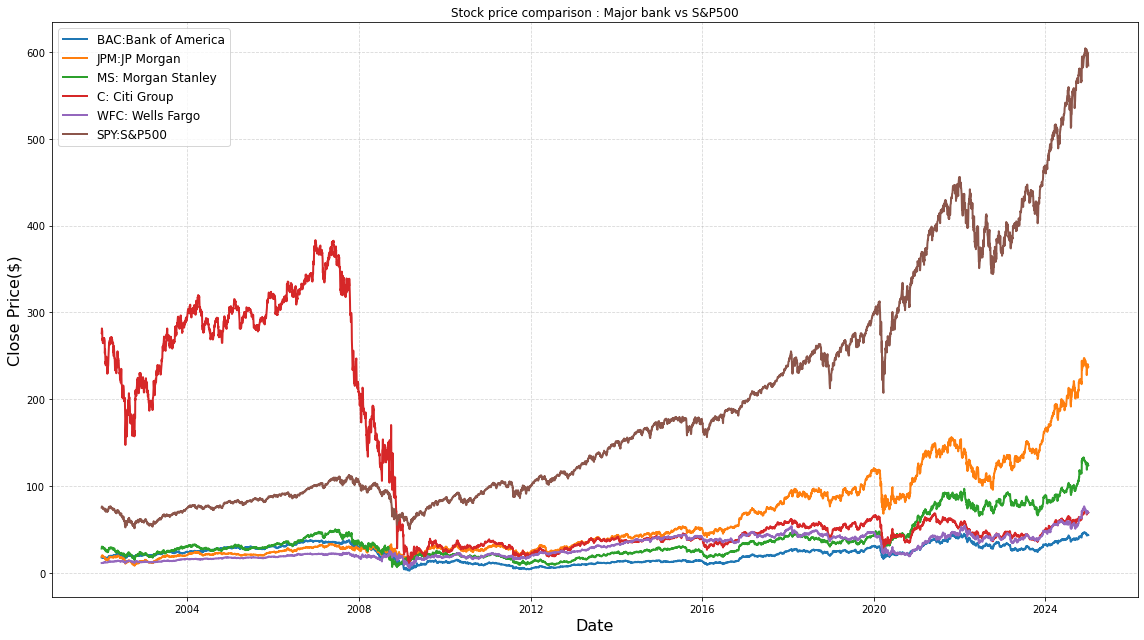

In [12]:
import matplotlib.pyplot as plt

# create a larger picture
plt.figure(figsize=(16,9))

#plot each stock
plt.plot(data.index,data['BAC'],label='BAC:Bank of America',linewidth=2)
plt.plot(data.index,data['JPM'],label='JPM:JP Morgan',linewidth=2)
plt.plot(data.index,data['MS'],label='MS: Morgan Stanley',linewidth=2)
plt.plot(data.index,data['C'],label='C: Citi Group',linewidth=2)
plt.plot(data.index,data['WFC'],label='WFC: Wells Fargo',linewidth=2)
plt.plot(data.index,data['SPY'],label='SPY:S&P500',linewidth=2)

# Title,label for X & Y Axis
plt.title('Stock price comparison : Major bank vs S&P500')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close Price($)',fontsize=16)

plt.grid(True,linestyle='--',alpha=0.5)

#customize legend
plt.legend(fontsize=12,loc='upper left')

#show the plot
plt.tight_layout()
plt.show()


In [13]:
# feature engineering
df=pd.DataFrame(index=data.index)

# create lag features-stock data
df['JPM(t-1)']=data['JPM'].shift(1)
df['BAC(t-1)']=data['BAC'].shift(1)
df['MS(t-1)']=data['MS'].shift(1)
df['C(t-1)']=data['C'].shift(1)
df['WFC(t-1)']=data['WFC'].shift(1)
df['SPY(t-1)']=data['SPY'].shift(1)

# create lag features-macro data
df['^VIX(t-1)']=data['^VIX'].shift(1)
df['^TNX(t-1)']=data['^TNX'].shift(1)
df['GCF(t-1)']=data['GC=F'].shift(1)
df['DX-Y.NYB(t-1)']=data['DX-Y.NYB'].shift(1)
df['CL=F(t-1)']=data['CL=F'].shift(1)

# Technincal Indicators= moving average & rolling volatility
df['BAC_MA5']=data['BAC'].rolling(window=5).mean().shift(1)
df['BAC_MA10']=data['BAC'].rolling(window=10).mean().shift(1)
df['BAC_Vola5']=data['BAC'].pct_change(5).shift(1)

# Target variable
df['Target']=data['BAC']
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

JPM(t-1)         0
BAC(t-1)         0
MS(t-1)          0
C(t-1)           0
WFC(t-1)         0
SPY(t-1)         0
^VIX(t-1)        0
^TNX(t-1)        0
GCF(t-1)         0
DX-Y.NYB(t-1)    0
CL=F(t-1)        0
BAC_MA5          0
BAC_MA10         0
BAC_Vola5        0
Target           0
dtype: int64

In [15]:
# Train our ML Algo
# a) Tell what is X & Y variables
#b) split our data into training and test
# c) apply ML Algorithm
# d) do the prediction
# e) evaluate the model based on RMSE, MSE,R2
#f) visualization

In [16]:
# a) Tell what is X & Y variables
X=df.drop('Target',axis=1)
Y=df['Target']

In [17]:
#b) split our data into training and test(80:20)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,shuffle=False,test_size=0.10)


In [18]:
# c) apply ML Algorithm : Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor(max_depth=4)
dt_model.fit(X_train,Y_train) #train my dt



DecisionTreeRegressor(max_depth=4)

In [19]:
#d) do prediction

dt_pred=dt_model.predict(X_test)
dt_pred

array([32.10763849, 32.10763849, 32.10763849, 32.10763849, 32.10763849,
       32.10763849, 32.10763849, 32.10763849, 32.10763849, 29.38095643,
       29.38095643, 29.38095643, 29.38095643, 29.38095643, 29.38095643,
       26.95779127, 29.38095643, 29.38095643, 29.38095643, 29.38095643,
       29.38095643, 29.38095643, 26.95779127, 26.95779127, 29.38095643,
       29.38095643, 32.10763849, 32.10763849, 32.10763849, 32.10763849,
       32.10763849, 32.10763849, 32.10763849, 32.10763849, 32.10763849,
       32.10763849, 32.10763849, 32.10763849, 32.10763849, 32.10763849,
       35.75882264, 35.75882264, 35.75882264, 35.75882264, 35.75882264,
       35.75882264, 35.75882264, 35.75882264, 35.75882264, 35.75882264,
       35.75882264, 35.75882264, 35.75882264, 35.75882264, 35.75882264,
       35.75882264, 35.75882264, 35.75882264, 35.75882264, 32.10763849,
       32.10763849, 32.10763849, 29.38095643, 29.38095643, 29.38095643,
       29.38095643, 29.38095643, 29.38095643, 29.38095643, 29.38

In [20]:
result=pd.DataFrame(Y_test.index)
result['Actual']=Y_test.values
result['Predicted']=dt_pred
result

,Date,Actual,Predicted
0,2022-09-12,32.761250,32.107638
1,2022-09-13,31.581585,32.107638
2,2022-09-14,31.460833,32.107638
3,2022-09-15,32.055305,32.107638
4,2022-09-16,31.693045,32.107638
...,...,...,...
575,2024-12-24,43.843319,42.941825
576,2024-12-26,44.011265,42.941825
577,2024-12-27,43.803802,42.941825
578,2024-12-30,43.379002,42.941825


In [21]:
# evaluate the model based on R2, rmse,mse
from sklearn.metrics import r2_score,mean_squared_error
def evaluate_model(y_true,y_pred,model_name):
    r2=r2_score(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    rmse=np.sqrt(mse)
    print("Model Name",model_name)
    print("R2 Value", r2)
    print("MSE",mse)
    print("RMSE",rmse)
    
evaluate_model(Y_test,dt_pred,"Decision Tree")

Model Name Decision Tree
R2 Value 0.9582605475866579
MSE 1.3232184618010214
RMSE 1.1503123322824202


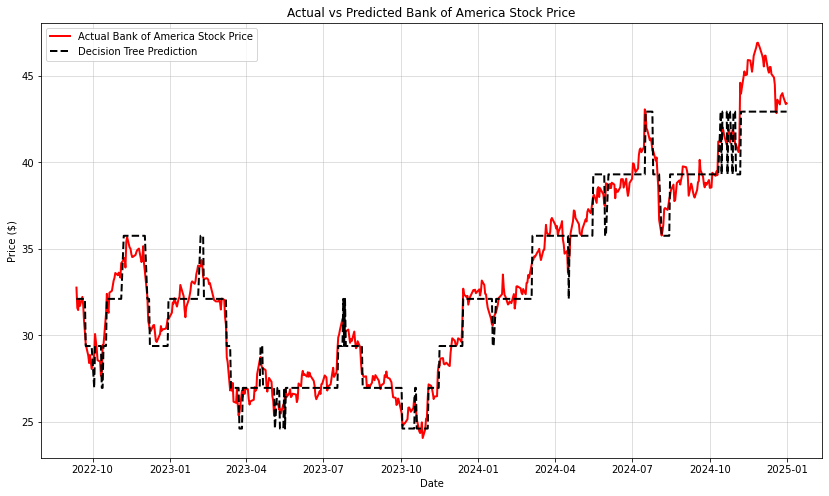

In [22]:
# f) Visualtion => Actual vs Forecasted
# Plot figure => tell figure size
plt.figure(figsize = (14,8))
#Plot Actual Value and Predicted Value (X = Date, Y = Stock Price)
plt.plot(Y_test.index, Y_test, label = 'Actual Bank of America Stock Price',linewidth=2,color='red')
plt.plot(Y_test.index, dt_pred, label = 'Decision Tree Prediction', linewidth=2,color='black',linestyle='--')

# Highlight title, xlabel, and ylabel
plt.title("Actual vs Predicted Bank of America Stock Price")
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(alpha = 0.5)
plt.legend()
plt.show()


In [23]:
# What all features are important?
importance = dt_model.feature_importances_
features_name = X_train.columns
df_features = pd.DataFrame({'Feature':features_name, 'Importance': importance})
df_features = df_features.sort_values(by = 'Importance', ascending = False)
df_features

,Feature,Importance
1,BAC(t-1),1.0
0,JPM(t-1),0.0
2,MS(t-1),0.0
3,C(t-1),0.0
4,WFC(t-1),0.0
5,SPY(t-1),0.0
6,^VIX(t-1),0.0
7,^TNX(t-1),0.0
8,GCF(t-1),0.0
9,DX-Y.NYB(t-1),0.0


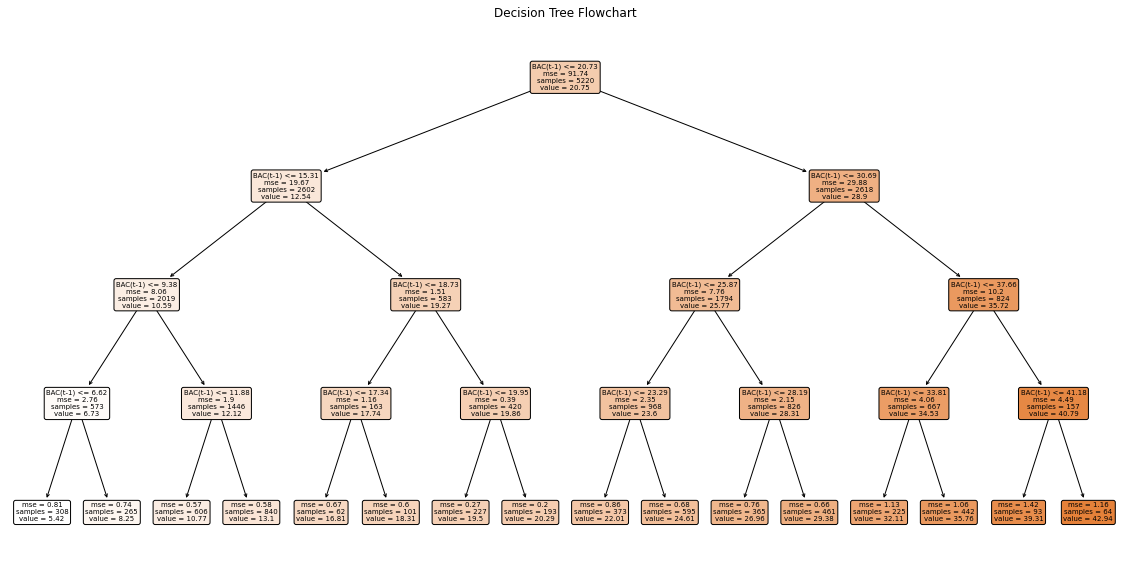

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,10))
plot_tree(dt_model, feature_names = X.columns, filled = True, rounded = True,precision=2)
plt.title("Decision Tree Flowchart")
plt.show()
